# Import Module

In [1]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_scaffold

# Load Data File

In [2]:
DATA_DIR = '../data'

In [3]:
# Method to generate the data file for the scaffolds
get_scaffold()

  0%|          | 0/10718647 [00:00<?, ?it/s][11:02:18] Explicit valence for atom # 3 N, 4, is greater than permitted
[11:02:18] Explicit valence for atom # 14 N, 4, is greater than permitted
  0%|          | 1272/10718647 [00:00<43:12, 4134.14it/s][11:02:18] Explicit valence for atom # 1 N, 5, is greater than permitted
[11:02:18] Explicit valence for atom # 16 N, 4, is greater than permitted
[11:02:18] Explicit valence for atom # 32 N, 4, is greater than permitted
  0%|          | 2207/10718647 [00:00<40:47, 4378.08it/s][11:02:19] Explicit valence for atom # 8 N, 5, is greater than permitted
[11:02:19] Explicit valence for atom # 8 N, 5, is greater than permitted
  0%|          | 2648/10718647 [00:00<41:58, 4255.70it/s][11:02:19] Explicit valence for atom # 11 N, 5, is greater than permitted
[11:02:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 17
  0%|          | 6070/10718647 [00:01<35:23, 5044.51it/s][11:02:19] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20


In [2]:
scaffold_dict = json.load(open(f'{DATA_DIR}/scaffold_dump.json'))

In [3]:
scaffold_df = pd.DataFrame(scaffold_dict)
scaffold_df.head(2)

,scaffold,year,patent_ID
0,C1CCNC1,2015,EP-2842582-A2
1,O=C(CNCCCc1ccccc1)N1CCCC1,2015,EP-2838373-A2


In [4]:
len(scaffold_df)

21812332

# Calculating Scaffolds per year

In [5]:
scaffold_count_df = pd.DataFrame(scaffold_df['year'].value_counts()).reset_index()
scaffold_count_df = scaffold_count_df.sort_values('year', ascending=True)
scaffold_count_df

,year,count
4,2015,2716550
3,2016,2832380
0,2017,3338707
6,2018,2560366
5,2019,2628865
2,2020,2913536
1,2021,2998442
7,2022,1823486


In [6]:
grouped_df = scaffold_df.groupby('patent_ID')['scaffold'].count().reset_index()
grouped_df = grouped_df.groupby('scaffold')['patent_ID'].count().reset_index()

In [7]:
grouped_df

,scaffold,patent_ID
0,1,116312
1,2,63777
2,3,39691
3,4,27892
4,5,20277
...,...,...
2026,5559,1
2027,5857,1
2028,6151,1
2029,6182,1


# Visualisation

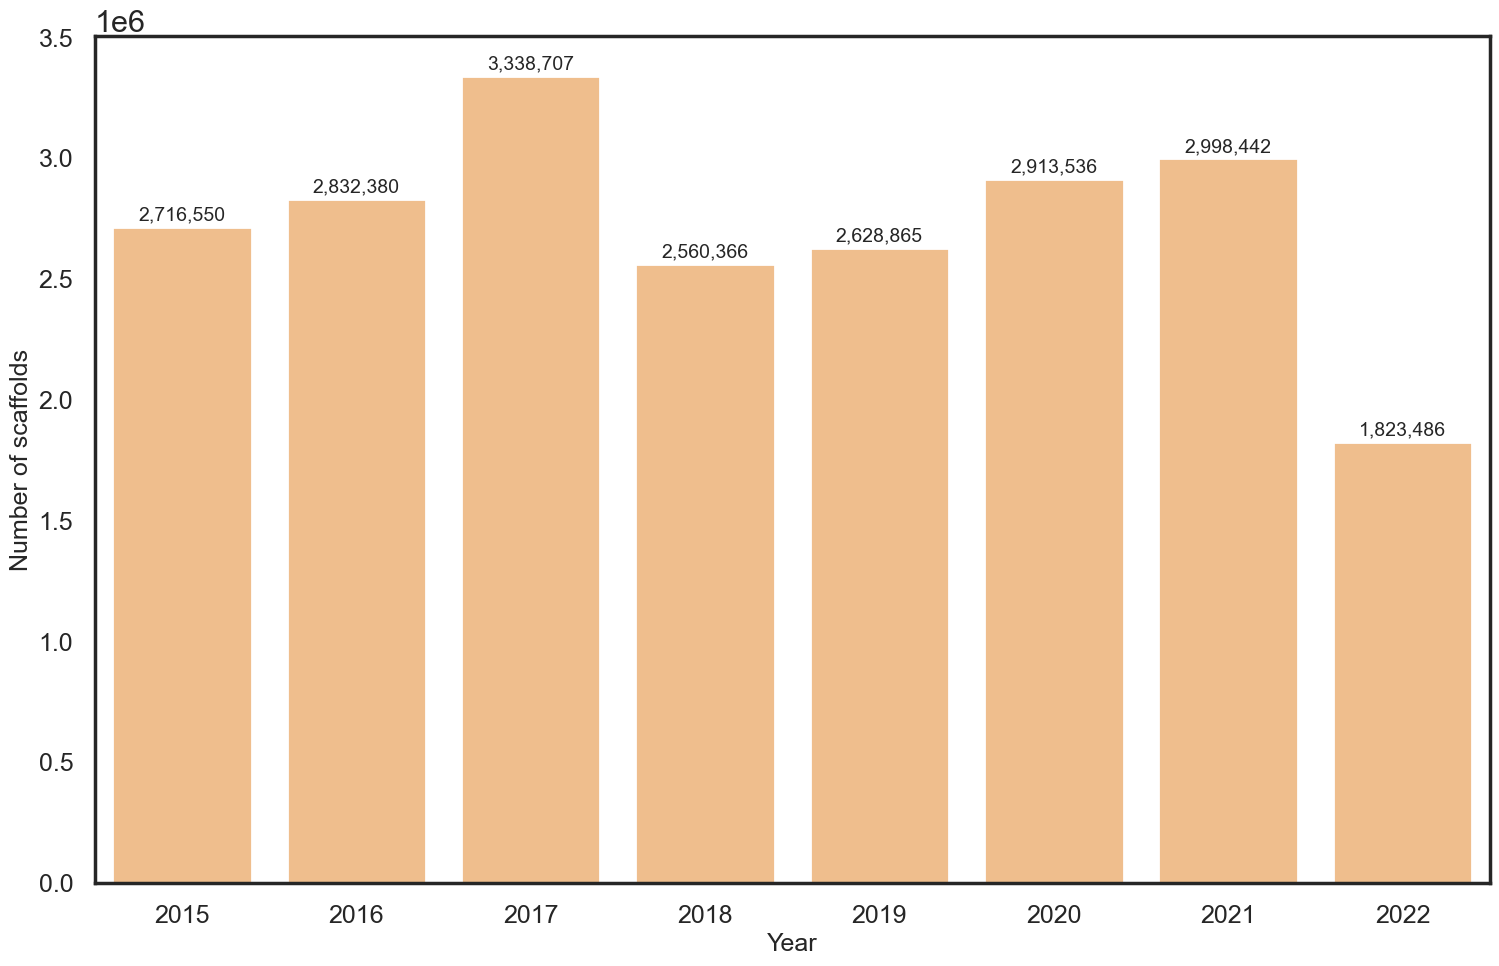

In [10]:
plt.figure(figsize = (18,11))
ax = sns.barplot(x= scaffold_count_df['year'], y= scaffold_count_df['count'], color='#ffbe7d')
sns.set(context='poster')
sns.set_style("white")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of scaffolds", fontsize=18)
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding= 2, fontsize=14)
plt.show()

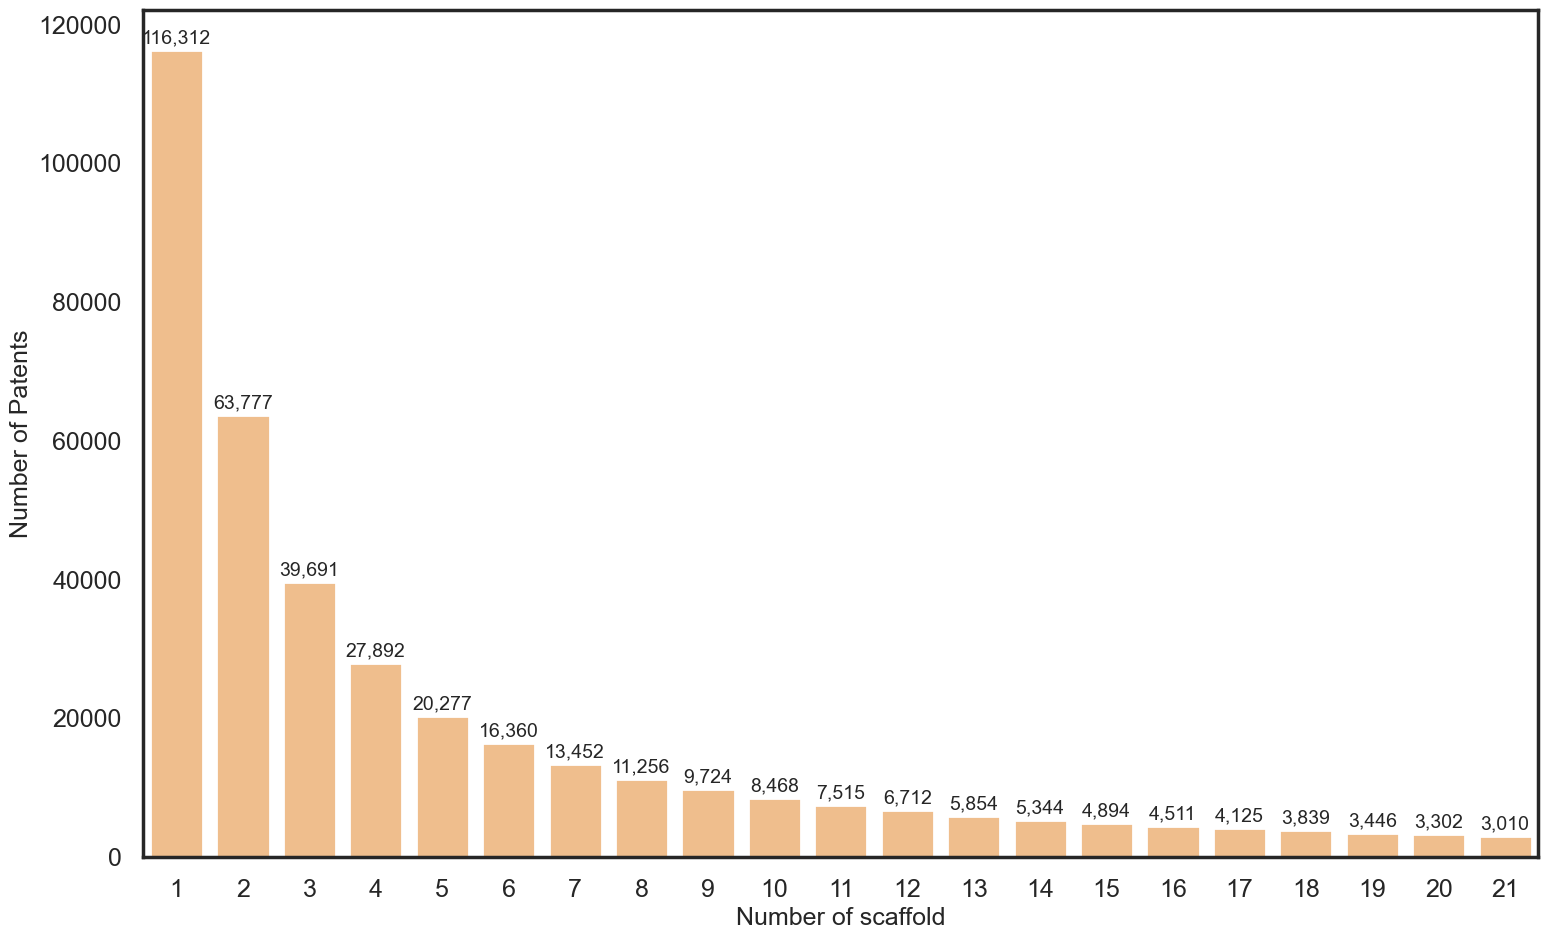

In [11]:
plt.figure(figsize = (18,11))
ax1 = sns.barplot(x= grouped_df['scaffold'], y= grouped_df['patent_ID'], color='#ffbe7d')
sns.set(context='poster')
sns.set_style("white")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Number of scaffold", fontsize=18)
plt.ylabel("Number of Patents", fontsize=18)
for c in ax1.containers:
    ax1.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding= 2, fontsize=14)
    
plt.xlim(-0.5,20.5)    
plt.show()